In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import spacy
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from scipy.sparse import hstack
from scipy.sparse import csr_matrix


/Users/gennasilva/olympics dataset/ai4all/myenv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nlp = spacy.load('en_core_web_sm')

In [4]:
df = pd.read_csv("reduced_spotify_data.csv")
df.head()

,text,Genre,Tempo,emotion,vec
0,Lyrics/Music Yellen/Pokrass Why are grown up p...,hip hop,64,joy,[ 0.15330859 -0.22987816 0.00712303 0.021512...
1,"Sharing's good, sharing's fine But no one w...","rock,progressive rock,classic rock",77,joy,[-6.18192591e-02 -3.09498429e-01 5.58754578e-...
2,"[Intro] Let it go, let it go Can’t hold it bac...","synthpop,pop,electropop",140,joy,[-3.57360393e-01 -6.44425571e-01 2.06892177e-...
3,"[Intro: Sav'O] (Madara) J'S, J'S [Verse 1: Sa...",hip hop,175,anger,[ 0.00773717 -0.31387663 0.08789369 0.067534...
4,"[Produced by: THEMPeople] [Intro: Sample] ""Lo...",country,96,anger,[-0.03349667 -0.45959458 0.14409794 -0.026550...


In [12]:
df = df[['text', 'Genre', 'Tempo', 'emotion']].dropna()

Vectorizing the lyrics

In [13]:
df['vec'] = df['text'].apply(lambda doc: nlp(doc).vector)

2D Array with vectorized values

In [18]:
lyrics = np.array([np.array(vec) for vec in df['vec']])

Encode genres

In [27]:
ohe = OneHotEncoder(sparse_output=False)
genre = ohe.fit_transform(df[['Genre']])

Reshape the tempo into a 2D array to feed into model

In [28]:
tempo = df['Tempo'].values.reshape(-1,1)

In [29]:
print(type(genre))

<class 'numpy.ndarray'>


In [30]:
combine_features = np.hstack([lyrics,genre,tempo])

split to train

In [32]:
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(combine_features, y, test_size=0.2, random_state=42)

In [34]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.32      0.36       185
        fear       0.00      0.00      0.00        49
         joy       0.48      0.60      0.53       396
        love       0.00      0.00      0.00        48
     sadness       0.42      0.47      0.44       314
    surprise       0.00      0.00      0.00         8

    accuracy                           0.45      1000
   macro avg       0.22      0.23      0.22      1000
weighted avg       0.40      0.45      0.42      1000



/Users/gennasilva/olympics dataset/ai4all/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gennasilva/olympics dataset/ai4all/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gennasilva/olympics dataset/ai4all/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _

Finding null values to clean data

In [35]:
df.isnull().values.any()
df.isnull().head()
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

text       0
Genre      0
Tempo      0
emotion    0
vec        0
dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'joy'),
  Text(1, 0, 'sadness'),
  Text(2, 0, 'anger'),
  Text(3, 0, 'love')])

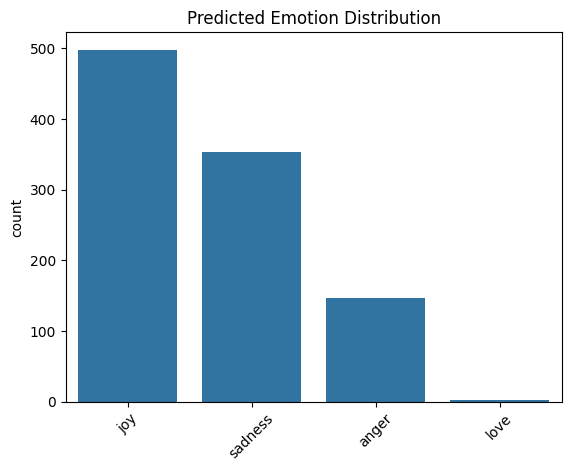

In [36]:
sns.countplot(x=y_pred)
plt.title("Predicted Emotion Distribution")
plt.xticks(rotation=45)

In [ ]:
df.shape

(5000, 5)